Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Shadab Iqbal"
COLLABORATORS = ""

---

# WALKTHROUGH
Watch [this](https://youtu.be/_91orr0Yags) how-to tutorial first

In [2]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [3]:
import numpy as np 
from skimage import io, color, exposure
import matplotlib.pyplot as plt 

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`. 

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [4]:
I = io.imread("sample.jpeg") # Replace None with appropriate function call line


# find the height and the width of the image
H = I.shape[0] # should contain height
W = I.shape[1] # should contain width
print("Height is", H)
print("Width is", W)

# YOUR CODE HERE

Height is 760
Width is 751


(-0.5, 750.5, 759.5, -0.5)

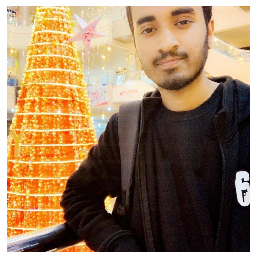

In [5]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I = I/255.0 

# YOUR CODE HERE
io.imshow(I)
plt.axis("off")

(-0.5, 750.5, 759.5, -0.5)

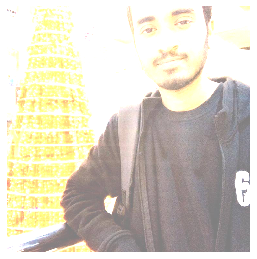

In [6]:
# Increase the brightness of the image without changing the contrast. 
# Save the resulting image in I_bright and display it.
I_bright = np.clip(I + 0.5, 0, 1)

# YOUR CODE HERE
io.imshow(I_bright)
plt.axis("off")

(-0.5, 750.5, 759.5, -0.5)

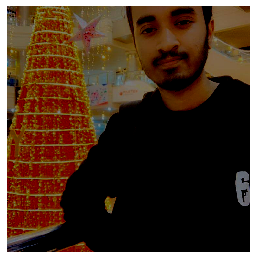

In [7]:
# Decrease the brightness of the image without changing the contrast. 
# Save the resulting image in I_dark and display it.
I_dark = np.clip(I - 0.5, 0, 1)

# YOUR CODE HERE
io.imshow(I_dark)
plt.axis("off")

(-0.5, 750.5, 759.5, -0.5)

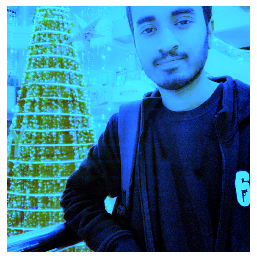

In [8]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3 
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = np.zeros(I.shape)

# HINT: 
I_tint[:, :, 0] = np.clip(I[:, :, 0] * 0.3, 0, 1)
I_tint[:, :, 1] = np.clip(I[:, :, 1] * 1, 0, 1)
I_tint[:, :, 2] = np.clip(I[:, :, 2] * 3, 0, 1)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

# YOUR CODE HERE
io.imshow(I_tint)
plt.axis("off")

(-0.5, 750.5, 759.5, -0.5)

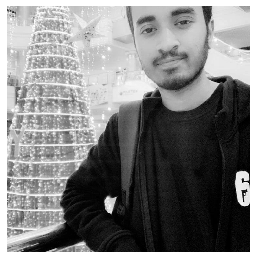

In [9]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)

# YOUR CODE HERE
io.imshow(I_gray)
plt.axis("off")

(-0.5, 750.5, 759.5, -0.5)

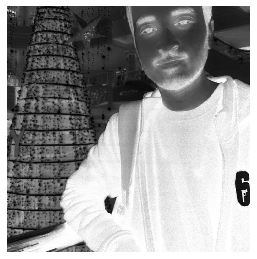

In [10]:
# Display the negative of the grayscale image

# YOUR CODE HERE
I_neg = 1 - I_gray
io.imshow(I_neg)
plt.axis("off")

Text(0.5, 1.0, 'Histogram')

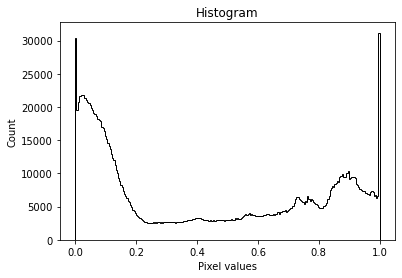

In [11]:
plt.hist(I.ravel(), bins=256, histtype="step", color="black")
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram")

(-0.5, 750.5, 759.5, -0.5)

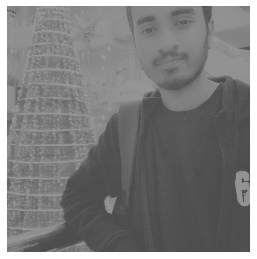

In [12]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

Idegraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))

# YOUR CODE HERE
io.imshow(Idegraded)
plt.axis("off")

# plt.hist(Idegraded.ravel(), bins=256, histtype="step", color="black")
# plt.xlabel("Pixel values")
# plt.ylabel("Count")
# plt.title("Histogram")

In [13]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    pass 
    # Write your code here
    I_stretched = np.zeros(I.shape)
    I_stretched[I < r1] = ((I[I < r1] - 0) * ((s1-0) / (r1-0))) + 0
    I_stretched[(I >= r1) & (I <= r2)] = ((I[(I >= r1) & (I <= r2)] - r1) * ((s2-s1) / (r2-r1))) + s1
    I_stretched[I > r2] = ((I[I > r2] - r2) * ((1-s2) / (1-r2))) + s2
    return I_stretched
    # YOUR CODE HERE

# I_stretched = piecewise_contrast_stretch(Idegraded, 0.3, 0.6, 0.1, 1.1)
# io.imshow(I_stretched)
# plt.axis("off")
# plt.hist(I_stretched.ravel(), bins=256, histtype="step", color="black")
# plt.xlabel("Pixel values")
# plt.ylabel("Count")
# plt.title("Histogram")

(-0.5, 750.5, 759.5, -0.5)

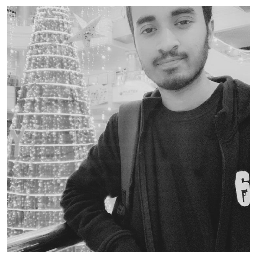

In [14]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.6
s1 = 0.1
s2 = 0.9
I_stretched = piecewise_contrast_stretch(Idegraded, r1, r2, s1, s2)

# Display the strtched image

# YOUR CODE HERE
io.imshow(I_stretched)
plt.axis("off")

# plt.hist(I_stretched.ravel(), bins=256, histtype="step", color="black")
# plt.xlabel("Pixel values")
# plt.ylabel("Count")
# plt.title("Histogram")

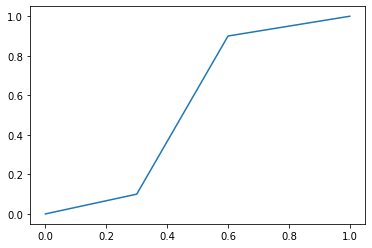

In [15]:
x_test = np.linspace(0, 1, 1000)
# print(x_test)
y_test = piecewise_contrast_stretch(x_test, 0.3, 0.6, 0.1, 0.9)
plt.plot(x_test, y_test)
plt.show()

# Task 2 - Histogram and Equalization

In [16]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Histogram'])
    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")
        
    plt.legend(['CDF'])
        
        
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True):
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")
    
    
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])
        
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])
    

def plot_cdf_color(I, nbins = 256):
    color=['r', 'g', 'b']
    for i in range(3):
        cdf, bins_cdf = exposure.cumulative_distribution(I[:, :, i].ravel(), nbins=nbins)
        plt.plot(bins_cdf, cdf, color[i])
    plt.xlabel("pixel values")
    plt.ylabel("percentage")
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

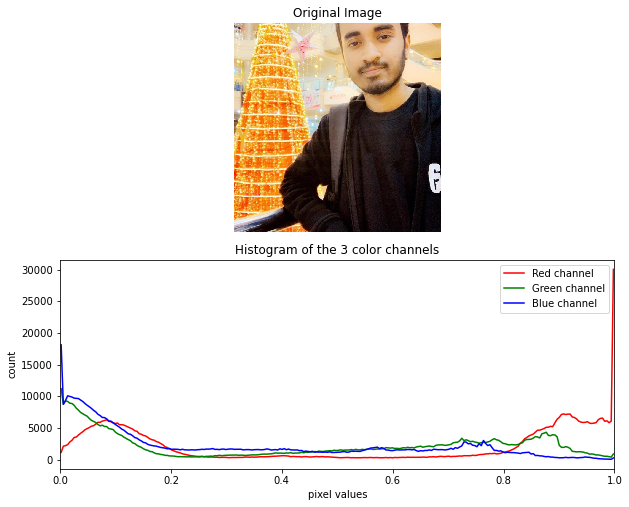

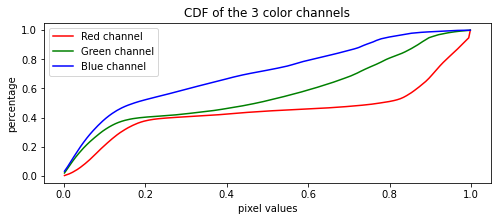

In [17]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms
import warnings
warnings.filterwarnings('ignore')

# YOUR CODE HERE
plt.rcParams['figure.figsize'] = (8, 10)

plt.subplot(3, 1, 1)
plt.title('Original Image')
io.imshow(I)
plt.axis('off')

plt.subplot(3, 1, 2)
plt.title('Histogram of the 3 color channels')
plot_hist_color(I)
plt.show()

plt.subplot(3, 1, 3)
plt.title('CDF of the 3 color channels')
plot_cdf_color(I)
plt.show()

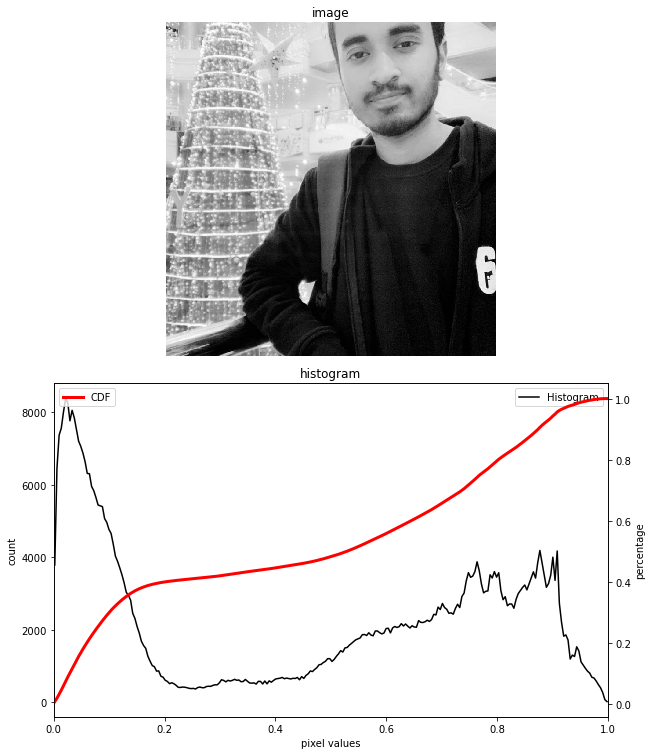

In [18]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

# YOUR CODE HERE

plot_img_and_hist(I_gray)

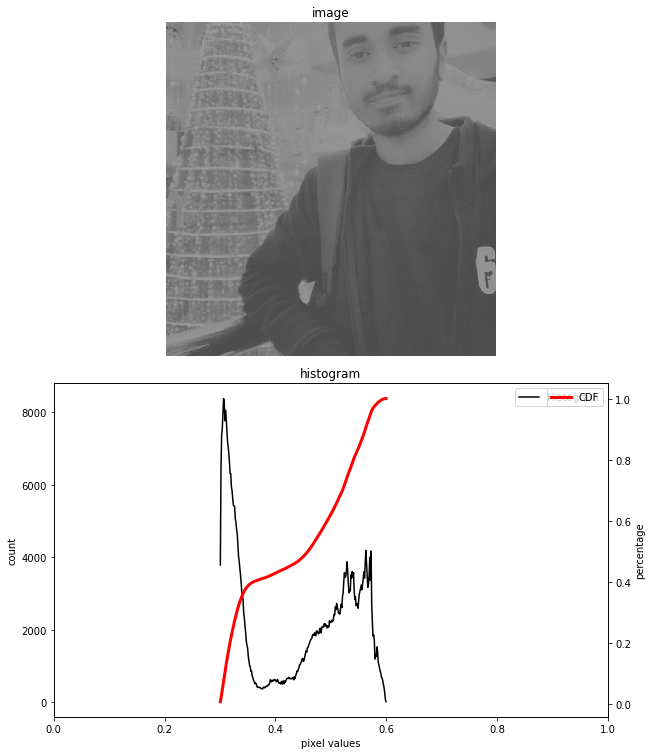

In [19]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

# YOUR CODE HERE

plot_img_and_hist(Idegraded)

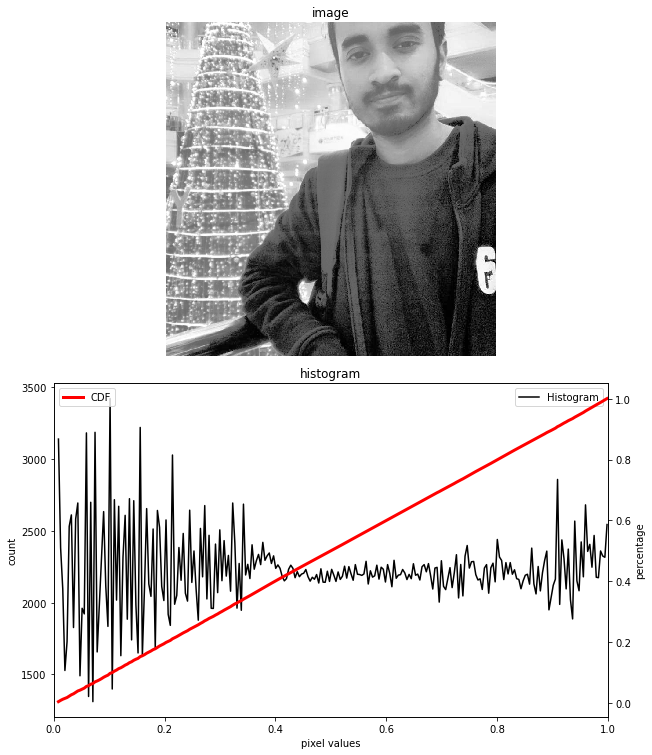

In [20]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = exposure.equalize_hist(Idegraded)

# YOUR CODE HERE
plot_img_and_hist(I_recon_gray)

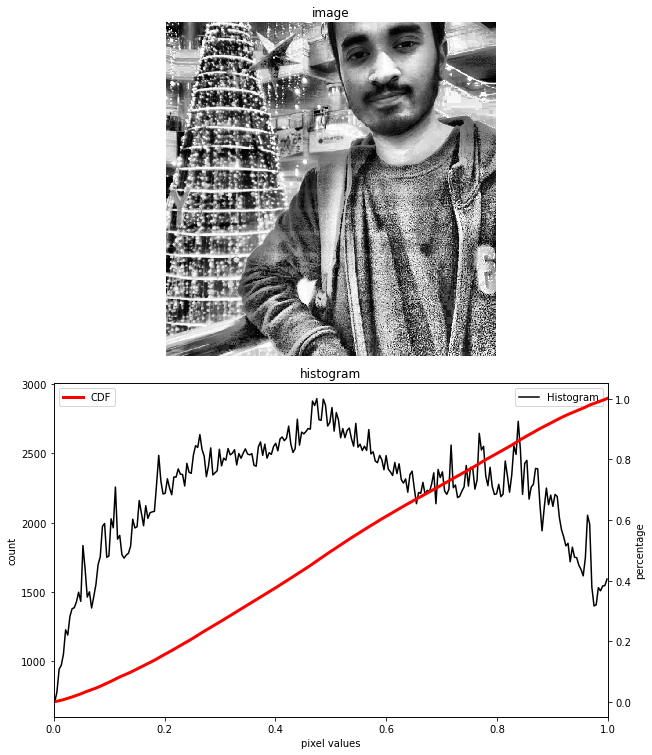

In [21]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = exposure.equalize_adapthist(Idegraded, kernel_size=(100, 100), clip_limit=0)

# YOUR CODE HERE

plot_img_and_hist(I_recon_gray_2)

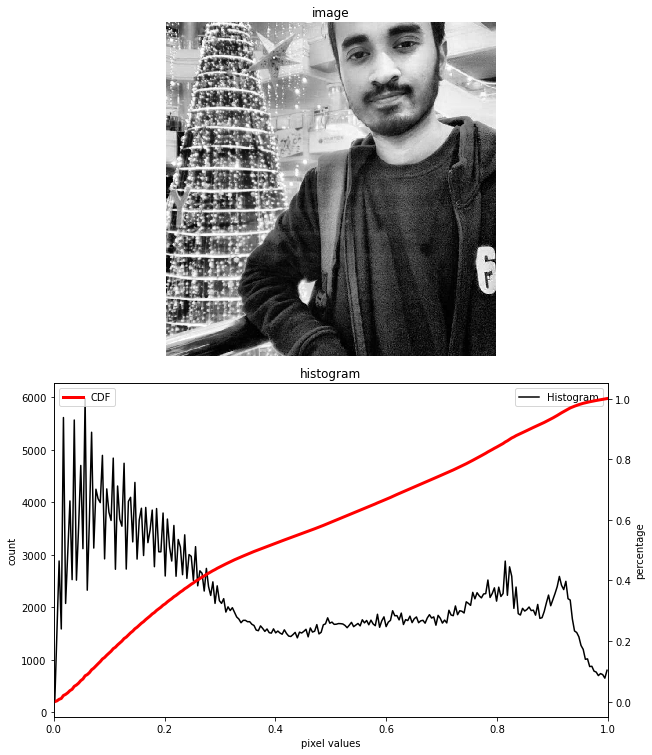

In [22]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = exposure.equalize_adapthist(Idegraded, kernel_size=(100, 100), clip_limit=0.01)

# YOUR CODE HERE

plot_img_and_hist(I_recon_gray_3)

(-0.5, 750.5, 759.5, -0.5)

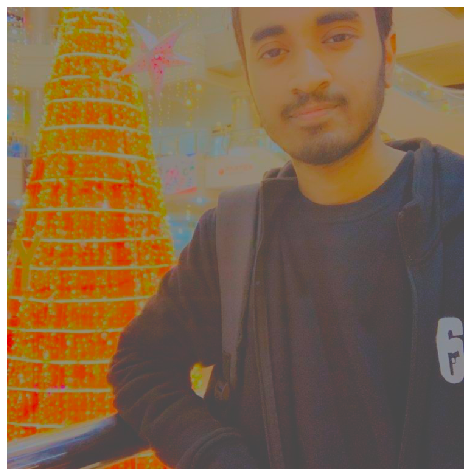

In [23]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space) 
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-4-demo-codes

I_rgb_degraded = None

# YOUR CODE HERE
Ilab = color.rgb2lab(I)
Ilab[:, :, 0] = Ilab[:, :, 0]/100
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.3, 0.6))
Ilab[:, :, 0] = Idegraded_l*100
I_rgb_degraded = color.lab2rgb(Ilab)

plt.rcParams["figure.figsize"] = (7, 7)

io.imshow(I_rgb_degraded)
plt.axis('off')

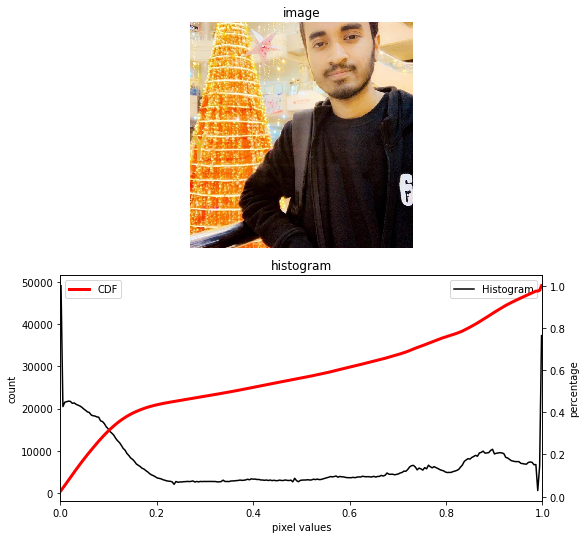

In [24]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes
I = io.imread("sample.jpeg")
I = I / 255.0

I_recon_color = None

# YOUR CODE HERE
# plt.subplot(1,2,1)
# Ilab = color.rgb2lab(I)
# Ilab[:, :, 0] = Ilab[:, :, 0]/100
# I_recon_color = exposure.equalize_adapthist(Ilab[:, :, 0],  kernel_size=(100, 100), clip_limit=0.001)
# Ilab[:, :, 0] = I_recon_color*100
# I_recon_color = color.lab2rgb(Ilab)

# io.imshow(I_recon_color)
# plt.axis('off')

# plt.subplot(1,2,2)
I_recon_color = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.001)

# io.imshow(I_recon_color)
# plt.axis('off')

plot_img_and_hist(I_recon_color)

# Task 3 - Open Ended

In [25]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using 
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

# YOUR CODE HERE

(-0.5, 1117.5, 849.5, -0.5)

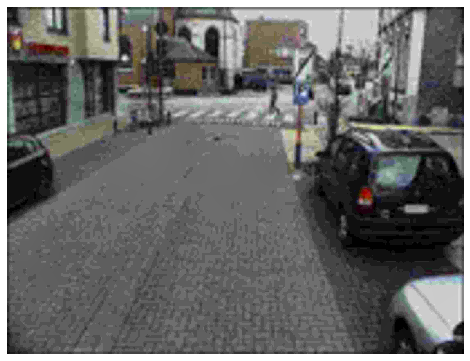

In [26]:
I = io.imread("challenge-1.jpg")
I = I / 255.0

# Ilab = color.rgb2lab(I)
# Ilab[:, :, 0] = Ilab[:, :, 0]/100
# plt.subplot(1,2,1)
I_final = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.01)
# Ilab[:, :, 0] = I_eq*100
# I_final = color.lab2rgb(Ilab)
io.imshow(I_final)
plt.axis('off')

# plt.subplot(1,2,2)
# I_final = piecewise_contrast_stretch(I, 0.01, 0.1, 0.1, 0.9)

# io.imshow(I_final)
# plt.axis('off')

# plot_img_and_hist(I_recon_color)

(-0.5, 1124.5, 849.5, -0.5)

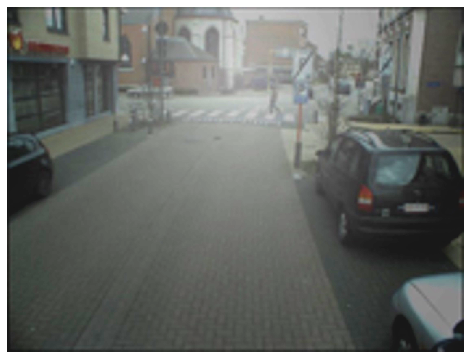

In [27]:
I = io.imread("challenge-2.jpg")
I = I / 255.0

# plt.subplot(1,2,1)
# Ilab = color.rgb2lab(I-0.05)
# Ilab[:, :, 0] = Ilab[:, :, 0]/100
# I_eq = exposure.equalize_adapthist(I-0.08, kernel_size=(100, 100), clip_limit=0.001)
# Ilab[:, :, 0] = I_eq*100
# I_final = color.lab2rgb(Ilab)

# io.imshow(I_eq)
# plt.axis('off')

# plt.subplot(1,2,1)
# Ilab = color.rgb2lab(I)
# Ilab[:, :, 0] = Ilab[:, :, 0]/100
# I_recon_gray = exposure.equalize_hist(Ilab[:, :, 0])
# Ilab[:, :, 0] = I_eq*100
# I_final = color.lab2rgb(Ilab)

# io.imshow(I_final)

# plt.axis('off')

# plt.subplot(1,2,2)
I_final = piecewise_contrast_stretch(I-0.05, 0.42, 0.85, 0.1, 0.9)

# plot_img_and_hist(I_final)
io.imshow(I_final)
plt.axis('off')

(-0.5, 1115.5, 849.5, -0.5)

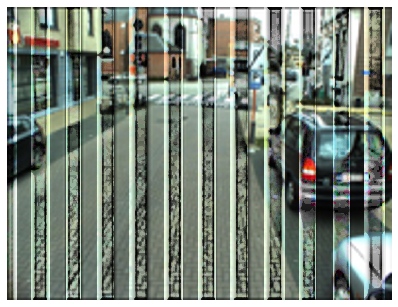

In [44]:
I = io.imread("challenge-3.jpg")
I = I / 255.0

plt.rcParams["figure.figsize"] = (6, 6)
# I_final = piecewise_contrast_stretch(I, 0.05, 0.15, 0.1, 0.9)

# io.imshow(I_final)
# plt.axis('off')

# plt.subplot(1,3,1)
# I_1 = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=1)

# io.imshow(I_1)
# plt.axis('off')

# Ilab = color.rgb2lab(I)
# Ilab[:, :, 0] = Ilab[:, :, 0]/100
# I_eq = exposure.equalize_adapthist(Ilab[:, :, 0], kernel_size=(100, 100), clip_limit=0)
# Ilab[:, :, 0] = I_eq*100
# I_final = color.lab2rgb(Ilab)

# plt.subplot(1,3,2)
# I_2 = exposure.equalize_hist(I)

# io.imshow(I_2)
# plt.axis('off')

# I_final = exposure.match_histograms(I_2, I_1)
# I_3 = piecewise_contrast_stretch(I, 0.01, 0.3, 0.1, 0.7)

I_final = I.copy()
I_final[:, :30] = exposure.equalize_hist(I_final[:, :30])
I_final[:, 70:125] = exposure.equalize_adapthist(I_final[:, 70:125], kernel_size=(100, 100), clip_limit=1)
I_final[:, 170:215] = exposure.equalize_adapthist(I_final[:, 170:215], kernel_size=(100, 100), clip_limit=1)
I_final[:, 260:310] = exposure.equalize_adapthist(I_final[:, 260:310], kernel_size=(100, 100), clip_limit=1)
I_final[:, 355:405] = exposure.equalize_adapthist(I_final[:, 355:405], kernel_size=(100, 100), clip_limit=1)
I_final[:, 455:510] = exposure.equalize_adapthist(I_final[:, 455:510], kernel_size=(100, 100), clip_limit=1)
I_final[:, 555:605] = exposure.equalize_adapthist(I_final[:, 555:605], kernel_size=(100, 100), clip_limit=1)
I_final[:, 645:700] = exposure.equalize_adapthist(I_final[:, 645:700], kernel_size=(100, 100), clip_limit=1)
I_final[:, 745:805] = exposure.equalize_adapthist(I_final[:, 745:805], kernel_size=(100, 100), clip_limit=1)
I_final[:, 845:895] = exposure.equalize_adapthist(I_final[:, 845:895], kernel_size=(100, 100), clip_limit=1)
I_final[:, 945:995] = exposure.equalize_adapthist(I_final[:, 945:995], kernel_size=(100, 100), clip_limit=1)
I_final[:, 1035:1095] = exposure.equalize_adapthist(I_final[:, 1035:1095], kernel_size=(100, 100), clip_limit=1)


# I_final[:, :30] = exposure.equalize_hist(I_final[:, :30])
# I_final[:, 70:125] = exposure.equalize_adapthist(I_final[:, 30:85], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 170:215] = exposure.equalize_adapthist(I_final[:, 125:170], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 260:310] = exposure.equalize_adapthist(I_final[:, 215:265], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 355:405] = exposure.equalize_adapthist(I_final[:, 310:360], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 455:510] = exposure.equalize_adapthist(I_final[:, 405:460], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 555:605] = exposure.equalize_adapthist(I_final[:, 510:560], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 645:700] = exposure.equalize_adapthist(I_final[:, 605:660], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 745:805] = exposure.equalize_adapthist(I_final[:, 700:760], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 845:895] = exposure.equalize_adapthist(I_final[:, 805:855], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 945:995] = exposure.equalize_adapthist(I_final[:, 895:945], kernel_size=(100, 100), clip_limit=1)
# I_final[:, 1035:1095] = exposure.equalize_adapthist(I_final[:, 945:1005], kernel_size=(100, 100), clip_limit=1)

# I_final = 1 - I_final2

# I_4 = np.copy(I)
# I_4[I < 0.2] = I_4[I < 0.2] * 3

# I_final2 = exposure.match_histograms(I_final, I)
# I_final = piecewise_contrast_stretch(I_final, 0.35, 0.55, 0.3, 0.7)

# plot_img_and_hist(I_final)

# plt.rcParams["figure.figsize"] = (7, 7)
# plt.subplot(1,3,3)

io.imshow(I_final)
plt.axis('off')